$\textbf{Baseline}$: Método de regresión multivariada, es decir
   $$\mathbf{Y}=\mathbf{X}\widehat{\mathbf{B}},$$

donde $\mathbf{Y}_{n\times |K|}$ es una matriz indicadora, donde cada renglón tiene ceros excepto en el lugar que corresponde al valor $y_k$, donde colocamos un 1. 

Por ejemplo, si alguna imagen corresponde al dígito "3", el renglón correspondiente en $\mathbf{Y}$ será $(0,0,0,1,0,0,0,0,0,0)$.

$\mathbf{X}_{n\times 784}$ es la matriz de características y $\widehat{\mathbf{B}}$ es la matriz cuyas columnas contienen los $|K|$ coeficientes correspondientes $\widehat{\boldsymbol{\beta}}_k$. 
    
Con esta formulación, asumimos un modelo lineal para cada respuesta $$\mathbf{y}_k:\widehat{\mathbf{y}}_k=\mathbf{X} \widehat{\boldsymbol{\beta}}_k,$$
  
y la clasificación para alguna observación $\mathbf{x}$ se obtiene mediante
    
$$\widehat{C}(\mathbf{x})=\arg \max\limits_{k\in K} \hat{y}_k.$$

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import keras
from keras.datasets import mnist

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(np.shape(x_train),np.shape(y_train),np.shape(x_test),np.shape(y_test))

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [4]:
nmax = 60000
num_classes = 10
img_width = img_height = x_train[0].shape[0]
x_t = x_train.reshape(x_train.shape[0], img_width*img_height)
X = x_t[0:nmax,]
X = X/255
y_train = y_train[0:nmax]
X_te = x_test.reshape(x_test.shape[0], img_width*img_height)
X_te = X_te/255
Y=pd.get_dummies(y_train).to_numpy()

In [6]:
#Implementation of the baseline from classification task

from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X,Y)
Y_predic=np.argmax(reg.predict(X_te),axis=1)
print("Score Test:",sum(Y_predic==y_test)/np.shape(y_test)*100)
Y_train=np.argmax(reg.predict(X),axis=1)
print("Score Train:",sum(Y_train==y_train)/np.shape(y_train)*100)

Score Test: [86.02]
Score Train: [85.77166667]


### Same classification task Using LDA and QDA 

In [7]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

In [8]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
nmax = 60000
num_classes = 10
img_width = img_height = x_train[0].shape[0]
x_t = x_train.reshape(x_train.shape[0], img_width*img_height)
X = x_t[0:nmax,]
X = X/255
y_train = y_train[0:nmax]
X_te = x_test.reshape(x_test.shape[0], img_width*img_height)
X_te = X_te/255
#y_train = keras.utils.to_categorical(y_train, num_classes)
Y=pd.get_dummies(y_train).to_numpy()

But first.... we use PCA to get better results

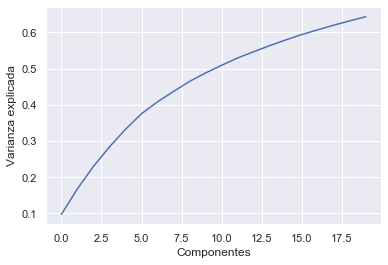

In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components=20)
pca.fit(X)
principalComponents = pca.transform(X)
pc_test = pca.transform(X_te)
X=principalComponents
X_te=pc_test
plt.xlabel("Componentes")
plt.ylabel("Varianza explicada")
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()

## LDA

In [11]:
lf = LDA()
lf.fit(X, y_train)
Y_predic=lf.predict(X_te)
print("Score Test:",sum(Y_predic==y_test)/np.shape(y_test)*100)
Y_train=clf.predict(X)
print("Score Train:",sum(Y_train==y_train)/np.shape(y_train)*100)

Score Test: [84.53]
Score Train: [94.59]


## QDA

In [10]:
clf = QDA()
clf.fit(X, y_train)
Y_predic=clf.predict(X_te)
print("Score Test:",sum(Y_predic==y_test)/np.shape(y_test)*100)
Y_train=clf.predict(X)
print("Score Train:",sum(Y_train==y_train)/np.shape(y_train)*100)

Score Test: [95.04]
Score Train: [94.59]


## To plot the images 

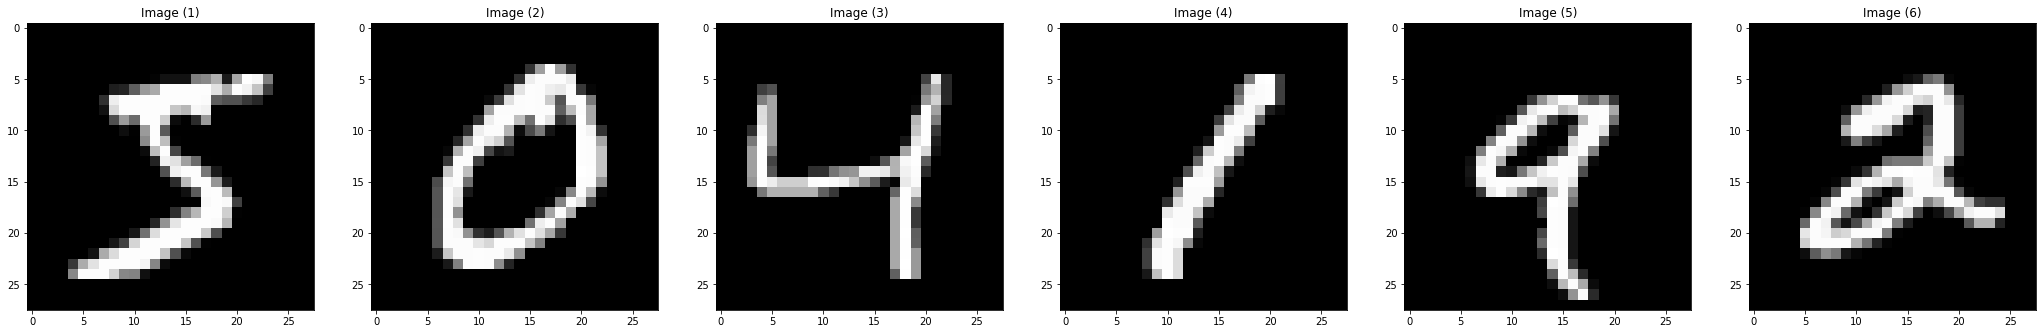

In [20]:
def show_images(images, cols = 1, titles = None):
    assert((titles is None)or (len(images) == len(titles)))
    n_images = len(images)
    if titles is None: titles = ['Image (%d)' % i for i in range(1,n_images + 1)]
    fig = plt.figure()
    for n, (image, title) in enumerate(zip(images, titles)):
        a = fig.add_subplot(cols, np.ceil(n_images/float(cols)), n + 1)
        if image.ndim == 2:
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
    plt.show()

imgs = []
for i in range(6): 
    imgs.append(x_train[i].reshape((28,28)))
show_images(imgs,1)
